# Yelp Data Challenge - NLP

Lei Chen

Oct 2018

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('../data/last_2_years_restaurant_reviews.csv', encoding = "ISO-8859-1")

In [3]:
df.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id,address,...,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,avg_stars,state
0,--9e1ONYQuAa-CB_Rrw7Tw,0,2017-02-14,0,VETXTwMw6qxzOVDlXfe6Tg,5,went for dinner tonight. Amazing my husband ha...,0,ymlnR8UeFvB4FZL56tCZsA,3355 Las Vegas Blvd S,...,"{'Monday': '11:30-14:0', 'Tuesday': '11:30-14:...",1.0,36.123183,-115.16919,Delmonico Steakhouse,The Strip,89109.0,1546.0,4.0,NV
1,--9e1ONYQuAa-CB_Rrw7Tw,0,2017-12-04,0,S8-8uZ7fa5YbjnEtaW15ng,5,This was an amazing dinning experience! ORDER ...,0,9pSSL6X6lFpY3FCRLEH3og,3355 Las Vegas Blvd S,...,"{'Monday': '11:30-14:0', 'Tuesday': '11:30-14:...",1.0,36.123183,-115.16919,Delmonico Steakhouse,The Strip,89109.0,1546.0,4.0,NV
2,--9e1ONYQuAa-CB_Rrw7Tw,0,2016-08-22,1,1nK5w0VNfDlnR3bOz13dJQ,5,My husband and I went there for lunch on a Sat...,1,gm8nNoA3uB4In5o_Hxpq3g,3355 Las Vegas Blvd S,...,"{'Monday': '11:30-14:0', 'Tuesday': '11:30-14:...",1.0,36.123183,-115.16919,Delmonico Steakhouse,The Strip,89109.0,1546.0,4.0,NV
3,--9e1ONYQuAa-CB_Rrw7Tw,0,2016-09-13,0,N1Z93BthdJ7FT2p5S22jIA,3,Went for a nice anniversary dinner. Researched...,0,CEtidlXNyQzgJSdF1ubPFw,3355 Las Vegas Blvd S,...,"{'Monday': '11:30-14:0', 'Tuesday': '11:30-14:...",1.0,36.123183,-115.16919,Delmonico Steakhouse,The Strip,89109.0,1546.0,4.0,NV
4,--9e1ONYQuAa-CB_Rrw7Tw,0,2015-02-02,0,_Uwp6FO1X-avE9wqTMC59w,5,This place is first class in every way. Lobste...,0,-Z7Nw2UF7NiBSAzfXNA_XA,3355 Las Vegas Blvd S,...,"{'Monday': '11:30-14:0', 'Tuesday': '11:30-14:...",1.0,36.123183,-115.16919,Delmonico Steakhouse,The Strip,89109.0,1546.0,4.0,NV


### Define feature variables, here is the text of the review

In [4]:
# Take the values of the column that contains review text data, save to a variable named "documents"
# df.isnull().sum()
documents = df['text']
documents[1]

'This was an amazing dinning experience! ORDER THE PORK CHOP! I will definitely return.'

In [5]:
# inspect documents, take a peek at elements of the numpy array
len(documents)

640718

### Define target variable (any categorical variable that may be meaningful)

#### For example, define perfect (5 stars) and imperfect (1-4 stars) rating

In [6]:
# Make a column and take the values, save to a variable named "target"
# df.columns.values.tolist()
df['target'] = (df['stars'] == 5) * 1

#### Check the statistic of the target variable

0    336924
1    303794
Name: target, dtype: int64


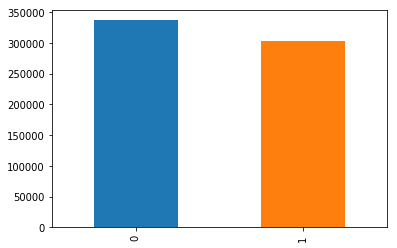

In [7]:
print(df['target'].value_counts())
df['target'].value_counts().plot.bar()

## Create training dataset and test dataset

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
# Now split the data to training set and test set
X = documents
y = df['target'].values

In [10]:
print(len(documents))
print(len(y))

640718
640718


In [11]:
# Split to documents_train, documents_test, target_train, target_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Get NLP representation of the documents

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [13]:
# Create TfidfVectorizer, and name it vectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=2000)

In [14]:
# X_train.shape
X_train.shape

(512574,)

In [15]:
# Train the model with training data
X_train_vector = vectorizer.fit_transform(X_train)
words = vectorizer.get_feature_names()
print(X_train_vector.shape)
words[-10:]

(512574, 2000)


['yelp',
 'yes',
 'yesterday',
 'york',
 'young',
 'yum',
 'yummy',
 'zero',
 'zucchini',
 'ào']

In [16]:
# Use the trained model to transform your test data
X_test_vector = vectorizer.transform(X_test)
X_test_vector.shape

(128144, 2000)

## Similar review search engine

In [17]:
import numpy as np

# Define helper methods which would be used soon

def get_top_values(lst, n, labels):
    '''
    INPUT: LIST, INTEGER, LIST
    OUTPUT: LIST

    Given a list of values, find the indices with the highest n values.
    Return the labels for each of these indices.

    e.g.
    lst = [7, 3, 2, 4, 1]
    n = 2
    labels = ["cat", "dog", "mouse", "pig", "rabbit"]
    output: ["cat", "pig"]
    '''
    return [labels[i] for i in np.argsort(lst)[::-1][:n]]  # np.argsort by default sorts values in ascending order

def get_bottom_values(lst, n, labels):
    '''
    INPUT: LIST, INTEGER, LIST
    OUTPUT: LIST

    Given a list of values, find the indices with the lowest n values.
    Return the labels for each of these indices.

    e.g.
    lst = [7, 3, 2, 4, 1]
    n = 2
    labels = ["cat", "dog", "mouse", "pig", "rabbit"]
    output: ["mouse", "rabbit"]
    '''
    return [labels[i] for i in np.argsort(lst)[::1][:n]]


In [18]:
# Use cosine similarity to define similarity of two vectors
from sklearn.metrics.pairwise import cosine_similarity

In [19]:
# Draw an arbitrary review from test (unseen in training) documents
import random
test_review = random.sample(X_test.tolist(), 1)
test_review

["I truly have mixed feelings about this bar. It's super smoky, the decor is very outdated and the food it's just ok. Most of the people that come here are big time gamblers from the ages of 45 to infinity! This is definitely a very laid back bar, not much action happens here.\r\nOne of the few food items that I liked the most were the baked penne pasta and the fish and chips. Other than that there are not that many good dishes. Most of the food items and drinks are very cheap which is probably why so many people come here. But I still wonder why so many people come???..I guess it's probably the same reason why my bf keeps making me come here, cause it reminds him of the bars from his small town! .. Either way, the bar is waaay too smoky and I will try not to come here as often! :)"]

In [20]:
# Transform the drawn review(s) to vector(s)
test_vec = vectorizer.transform(test_review)
test_vec.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.]])

In [21]:
# Calculate the similarity score(s) between vector(s) and training vectors
doc_simi = []
for doc, tf_doc in zip(X_train, X_train_vector):
    doc_simi.append(cosine_similarity(test_vec.todense().reshape(1, -1), tf_doc.reshape(1, -1)))

In [22]:
np.array(doc_simi).reshape(-1).shape

(512574,)

In [23]:
# find top 5 similar reviews
n = 5
doc_5_similar_reviews = get_top_values(np.array(doc_simi).reshape(-1), n, X_train.values)
doc_5_similar_reviews

['Jess, Val and Henning are always behind the bar to start your day!  Give this place a try!  Come once, come often!',
 'From out of town but each time we come to vegas we come.  Food is good and service is great.',
 'good food. good service, but some items are too salty.\r\ni probably wont come back again.',
 'Presentation of food was great, people were nice, food is great , bar stools need to be shorter for the bar, i had to huch over too far , decor is beautiful i will definitely come back',
 'Love this Bar.  Rob is a constant professional and we go out of our way to come up here just to see him.   The drinks are good.   The only thing that they need is Food.  Again Rob, Rob.  Come see Rob.']

In [24]:
print('Our search query:')
print(test_review) 

Our search query:
["I truly have mixed feelings about this bar. It's super smoky, the decor is very outdated and the food it's just ok. Most of the people that come here are big time gamblers from the ages of 45 to infinity! This is definitely a very laid back bar, not much action happens here.\r\nOne of the few food items that I liked the most were the baked penne pasta and the fish and chips. Other than that there are not that many good dishes. Most of the food items and drinks are very cheap which is probably why so many people come here. But I still wonder why so many people come???..I guess it's probably the same reason why my bf keeps making me come here, cause it reminds him of the bars from his small town! .. Either way, the bar is waaay too smoky and I will try not to come here as often! :)"]


In [25]:
print('Most %s similar reviews:' % n)
print(doc_5_similar_reviews)

Most 5 similar reviews:
['Jess, Val and Henning are always behind the bar to start your day!  Give this place a try!  Come once, come often!', 'From out of town but each time we come to vegas we come.  Food is good and service is great.', 'good food. good service, but some items are too salty.\r\ni probably wont come back again.', 'Presentation of food was great, people were nice, food is great , bar stools need to be shorter for the bar, i had to huch over too far , decor is beautiful i will definitely come back', 'Love this Bar.  Rob is a constant professional and we go out of our way to come up here just to see him.   The drinks are good.   The only thing that they need is Food.  Again Rob, Rob.  Come see Rob.']


## Classifying positive/negative review

#### Naive-Bayes Classifier

In [26]:
# Build a Naive-Bayes Classifier

from sklearn.naive_bayes import MultinomialNB

NB_model = MultinomialNB()

NB_model.fit(X_train_vector, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [27]:
# Get score for training set
NB_model.score(X_train_vector, y_train)

0.8027796961999634

In [28]:
# Get score for test set
NB_model.score(X_test_vector, y_test)

0.8031043201398427

#### Logistic Regression Classifier

In [29]:
# Build a Logistic Regression Classifier

from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()

lr_model.fit(X_train_vector, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [30]:
# Get score for training set
lr_model.score(X_train_vector, y_train)

0.8293592730025323

In [31]:
# Get score for test set
lr_model.score(X_test_vector, y_test)

0.8285210388313148

#### Q: What are the key features(words) that make the positive prediction?

In [32]:
# find it out by ranking
n = 20

get_top_values(lr_model.coef_.reshape(-1), n, words)

['amazing',
 'best',
 'incredible',
 'thank',
 'awesome',
 'phenomenal',
 'perfect',
 'heaven',
 'delicious',
 'perfection',
 'fantastic',
 'highly',
 'excellent',
 'favorite',
 'impeccable',
 'outstanding',
 'great',
 'omg',
 'love',
 'bomb']

Kind of use the significance of coefficient to determine the power of features in prediction

#### Q: What are the key features(words) that make the negative prediction?

In [33]:
# find it out by ranking
n = 20

get_bottom_values(lr_model.coef_.reshape(-1), n, words)

['worst',
 'horrible',
 'disappointing',
 'terrible',
 'rude',
 'mediocre',
 'bland',
 'lacked',
 'ok',
 'disgusting',
 'okay',
 'lacking',
 'awful',
 'poor',
 'worse',
 'meh',
 'slow',
 'tasteless',
 'overpriced',
 'flavorless']

The one of good side of logistic regression is that the coefficient significance is defined by absolutely value, so rank can work on find out the key features of -1

#### Random Forest Classifier

In [34]:
# Build a Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=200,max_depth=50,min_samples_leaf=3, random_state=1, n_jobs=-1)

rf_model.fit(X_train_vector, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=50, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [35]:
# Get score for training set
rf_model.score(X_train_vector, y_train)

0.8730446725741063

In [36]:
# Get score for test set
rf_model.score(X_test_vector, y_test)

0.8031667499063554

#### less overfitting than logistic regression

#### Check features importance by inspecting the RFC model?

In [38]:
n = 20
importances = rf_model.feature_importances_
importances.shape

(2000,)

In [39]:
n = 20
get_top_values(importances.reshape(-1), n, words)

['amazing',
 'best',
 'great',
 'delicious',
 'ok',
 'love',
 'awesome',
 'bad',
 'vegas',
 'didn',
 'definitely',
 'good',
 'worst',
 'wasn',
 'pretty',
 'favorite',
 'excellent',
 'horrible',
 'perfect',
 'minutes']

In [40]:
n = 20
get_bottom_values(importances.reshape(-1), n, words)

['proceeded',
 'tells',
 'giada',
 'nope',
 'contact',
 'apology',
 'eventually',
 'hookah',
 'worker',
 'receipt',
 'women',
 'jack',
 'industry',
 'confused',
 'color',
 'grabbed',
 'knife',
 'website',
 'cleaning',
 'greet']